# Finishing up: Visualizing Datatypes - Tabular data with Pandas

### and 

# Colormaps

1. Tabular data
   1. with Pandas (https://pandas.pydata.org/)
   1. ~~with NumPy (https://numpy.org/) (probably not time though... maybe next time?)~~


Let's start this notebook by importing our usual things:

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" # note, could also use like "sans-serif" others, just google

# lets also import numpy
import numpy as np

# to use pandas
import pandas as pd

# 1. Finishing up: Tabular Data with Pandas

Let's also try making some histograms from tabular data, in this case a CSV file.

Make sure you have the building inventory downloaded from the class website! https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv

We can also do a lot of these things with the `pandas` library.

(This is something you can pip or anaconda install if you need to.)

In [2]:
import pandas as pd

In [3]:
buildings = pd.read_csv('/Users/jillnaiman/Downloads/building_inventory.csv')

In [4]:
buildings
# formatting here is sort of nice

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


Pandas comes with a lot of nice built in functions like for example, we can easily count how many entries there are in this dataset:

In [5]:
# how many entries are there? as an iterable
buildings.index

RangeIndex(start=0, stop=8862, step=1)

We can print out slices of our dataset by index like so:

In [6]:
buildings.iloc[0:3] # subset by index

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


We can build up querys, like grab the agency name of the 100-110'th entries:

In [7]:
buildings.iloc[100:110]["Agency Name"] # grab 1-10 entries, and print out the Agency names of those entries

100    Department of Natural Resources
101    Department of Natural Resources
102    Department of Natural Resources
103    Department of Natural Resources
104    Department of Natural Resources
105    Department of Natural Resources
106    Department of Natural Resources
107    Department of Natural Resources
108    Department of Natural Resources
109     Department of Juvenile Justice
Name: Agency Name, dtype: object

We can use NumPy-like functions, like counting how many unique agency names are in our dataset:

In [8]:
buildings["Agency Name"].nunique() # how many unique agencies

35

We can also do this with categorical data, like the building status:

In [9]:
buildings["Bldg Status"].unique() 

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

If you are used to R at all, the `describe` function is sort of like "summary" function, and basically giving some summary statistics for the numerical data in our dataset.

Note that some of these statistics don't make sense, for example the "mean" zip code doesn't make physical sense.

In [10]:
buildings.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


Instead of using `.iloc` before, we can filter our data by using `.loc` which allows us to pass filtering information.

For example, let's only look at buildings that have zero square footage:

In [11]:
buildings.loc[buildings["Square Footage"] == 0] # boolean operation inside means zero square footage

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
74,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Assembly,Assembly,Not provided
76,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Business,Business,Not provided
181,Department of Corrections,Vandalia Correctional Center - Fayette County,"P.o. Box 500, Rte. 51 N.",Vandalia,62471,Fayette,15,John Shimkus,107,Cavaletto John,...,In Use,2001,2001,0,1,1,0,Industrial,Industrial,Not provided
333,Department of Transportation,Gurnee - Lake County,3516 West Washington Street,Gurnee,60031,Lake,18,Darin M. LaHood,99,Wojcicki Jimene Sara,...,In Use,2001,2001,0,1,1,0,Storage,Storage,Not provided
421,Northern Illinois University,Northern Illinois University - DeKalb,Northern Illinois University,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1999,1999,0,2,1,1,Education,Education,Not provided
422,Northern Illinois University,Northern Illinois University - DeKalb,1805 West Lincoln Hwy,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1997,1920,0,4,3,1,Storage,Storage,Not provided
507,Department of Natural Resources,Chain O'Lakes CA and SP - McHenry County,39947 North State Park Road,Spring Grove,60081,McHenry,14,Randy Hultgren,64,Wheeler Barbara,...,In Use,2001,2001,0,1,1,0,Residential,Residential,Not provided
540,Department of Agriculture,DuQuoin State Fairgrounds - Perry County,"Route #2, Box 306",Duquoin,62832,Perry,12,Mike Bost,115,Bryant Terri,...,In Use,1988,1988,0,1,1,0,Storage,Storage,Not provided
551,Department of Natural Resources,Nauvoo State Park - Hancock County,So Sidney,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Storage,Storage,Not provided
552,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Residential,Residential,Not provided


We can also filter for ongoing construction:

In [12]:
buildings.loc[buildings["Bldg Status"] == "In Progress"] # who is being built now?

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
772,Department of Veterans' Affairs,Quincy Veterans' Home - Adams County,1707 North 12th Street,Quincy,62301,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2010,2010,5200,1,1,0,Storage,Storage,Not provided
792,Chicago State University,Chicago State University - Cook County,95th & King Dirve,Chicago,60628,Cook,1,Bobby L. Rush,34,"Sims, Jr. Elgie R.",...,In Progress,2010,2010,30000,2,2,0,Education,Education,Not provided
796,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
797,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
798,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018,2018,1455,1,0,0,Storage,Storage,NaN
8852,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017,2017,6720,1,0,0,Storage,Utiility & Miscellan,NaN
8853,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN
8854,Department of Transportation,Marion Maintenance Facility - Williamson County,Intersate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN


There are also a lot of useful functions associated with our datasets, for example, we can plot the distribution of square footage:

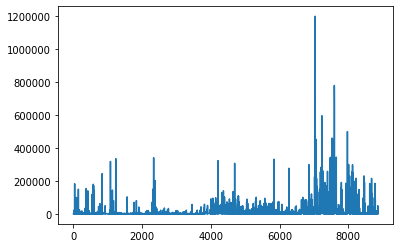

In [13]:
buildings["Square Footage"].plot() 
plt.show()

What can we do with this plot?  What are our options?

Check out: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

While the above was a "quick and dirty" plot, we can do fancier things:

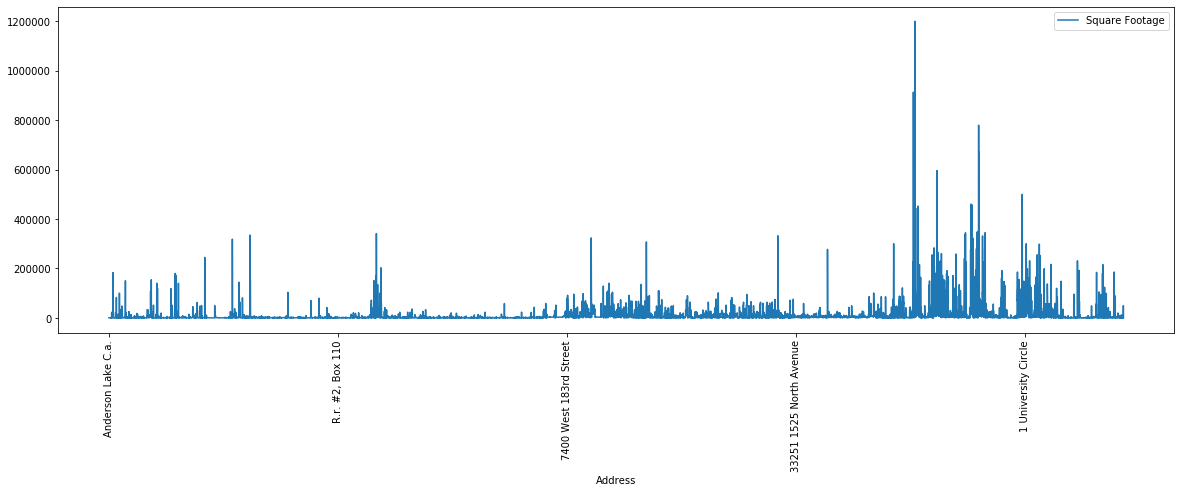

In [14]:
buildings.plot(x = "Address", y="Square Footage", figsize=(20,6), rot=90)

You can also use Pandas to generate the plot and then give you back the matplotlib `ax` objects we've been dealing with before:

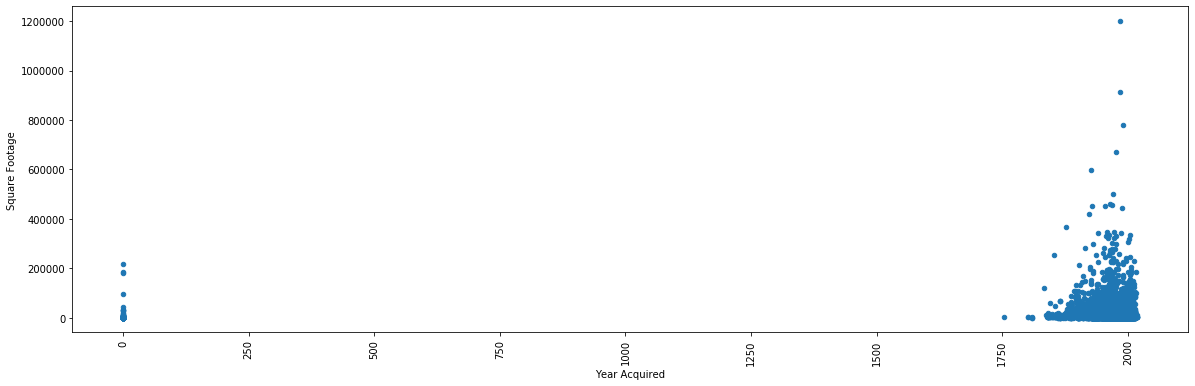

In [15]:
ax = buildings.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, kind='scatter')

(1750, 2010)

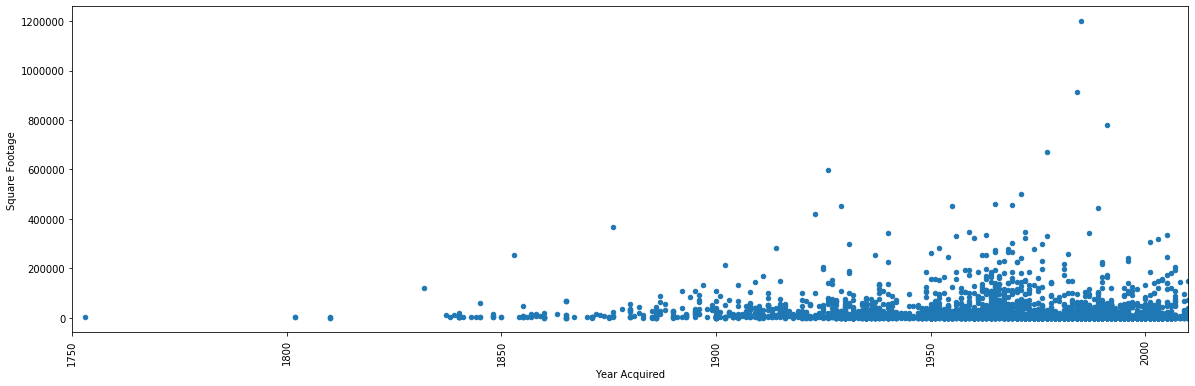

In [16]:
ax = buildings.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, kind='scatter')
ax.set_xlim(1750, 2010)

There are also some useful sorting functions within Pandas.  The `groupby` function can seem a little nebulous, but its a way to sort of "re-index" our datasets.  Here we'll re-group our data by the building's status:

In [17]:
buildings.groupby("Bldg Status") # this doesn't do anything until you call it

Now actually do something with this object, here, just print out - you can see "abandon" is at the top - so i first lists off all of the abandoned buildings.

In [18]:
for grouped in buildings.groupby("Bldg Status"):
    print(grouped)

('Abandon',                                     Agency Name  \
381                Department of Human Services   
449             Department of Natural Resources   
1050            Department of Natural Resources   
1139  Department of Central Management Services   
1172            Department of Natural Resources   
...                                         ...   
8682             Department of Military Affairs   
8683             Department of Military Affairs   
8760               Historic Preservation Agency   
8800             Department of Military Affairs   
8801             Department of Military Affairs   

                                         Location Name  \
381        Lincoln Developmental Center - Logan County   
449       Clinton Lake Recreation Area - DeWitt County   
1050           Jim Edgar Panther Creek F&WA - Cass Co.   
1139                                 Statewide Program   
1172   Saline County Conservation Area - Saline County   
...                        

In [19]:
for status, df in buildings.groupby("Bldg Status"):
    print(status, df.shape[0])

Abandon 226
In Progress 113
In Use 8523


We can also apply NumPy-like functions, for example `max`:

In [20]:
buildings.max()

Agency Name                   Western Illinois University
Location Name         Zimmerman Property - LaSalle County
City                                                 Zion
Zip code                                            68297
Congress Dist                                          18
Rep Dist                                              119
Senate Dist                                            60
Bldg Status                                        In Use
Year Acquired                                        2019
Year Constructed                                     2019
Square Footage                                    1200000
Total Floors                                           31
Floors Above Grade                                     30
Floors Below Grade                                      4
Usage Description                    Utiility & Miscellan
dtype: object

In [21]:
buildings["Square Footage"].min()

0

There are several differnet options for *how* to read data with Pandas.  For example, we can tell Pandas what to do with empty entries, i.e. ones with a `NaN` tag.

In [22]:
pd.read_csv?

In [23]:
b = pd.read_csv("/Users/jillnaiman/Downloads/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) 
# specify what to do with incomplete entries, here this just says if any of these columns have a value 0, treat
#  as a NaN or not-a-number

In [24]:
b["Square Footage"].min()

9.0

In [25]:
b["Year Constructed"].min()

1753.0

In [26]:
b["Year Acquired"].min()

1753.0

In [27]:
b.loc[b["Year Acquired"] < 1800]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
2796,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1753.0,1753.0,1200.0,1,1,0,Assembly,Assembly,Not provided


We can also mutate Pandas dataframes into new data with operations like sorting:

In [28]:
b2 = b.sort_values("Year Constructed")

In [29]:
b2.iloc[0] # this gives the oldest building - the one that was constructed in 1753

Agency Name                                     Historic Preservation Agency
Location Name              Fort De Chartres Historic Site - Prairie Du Ro...
Address                                                   1350 State Hwy 155
City                                                       Prairie Du Rocher
Zip code                                                               62241
County                                                              Randolph
Congress Dist                                                             12
Congressional Full Name                                            Mike Bost
Rep Dist                                                                 116
Rep Full Name                                             Costello, II Jerry
Senate Dist                                                               58
Senator Full Name                                               Paul Schimpf
Bldg Status                                                           In Use

We can build up Pandas commands to get new sorts of aggregated data:

In [30]:
b.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

We can then use that to make different plots:

In [31]:
aggregated_data = b.groupby("Year Acquired")["Square Footage"].sum()

In [32]:
aggregated_data.index

Float64Index([1753.0, 1802.0, 1810.0, 1832.0, 1837.0, 1838.0, 1839.0, 1840.0,
              1841.0, 1843.0,
              ...
              2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0],
             dtype='float64', name='Year Acquired', length=171)

In [33]:
aggregated_data.values

array([1.200000e+03, 4.440000e+03, 4.033000e+03, 1.200000e+05,
       1.030200e+04, 2.010000e+03, 1.175200e+04, 3.691800e+04,
       3.256000e+03, 9.000000e+02, 4.088000e+03, 6.584600e+04,
       2.129200e+04, 2.267000e+03, 2.550000e+05, 2.140000e+03,
       6.615400e+04, 7.500000e+02, 1.812400e+04, 2.236700e+04,
       4.847000e+03, 2.741700e+04, 1.579500e+04, 2.234940e+05,
       2.700000e+03, 2.864000e+03, 6.403000e+03, 1.490000e+04,
       1.100000e+04, 6.600000e+03, 3.808000e+03, 4.042800e+05,
       3.307100e+04, 1.798330e+05, 6.671000e+03, 5.926600e+04,
       8.725000e+03, 3.015700e+04, 1.683700e+05, 1.948230e+05,
       8.492400e+04, 8.633400e+04, 2.325000e+03, 1.514800e+05,
       3.959000e+04, 8.500000e+04, 2.256770e+05, 2.901650e+05,
       1.329070e+05, 3.676000e+04, 1.214750e+05, 3.358350e+05,
       1.094860e+05, 2.697250e+05, 1.605840e+05, 4.096400e+04,
       3.128860e+05, 2.037400e+04, 1.332850e+05, 3.602520e+05,
       2.982830e+05, 2.314110e+05, 2.377220e+05, 4.2281

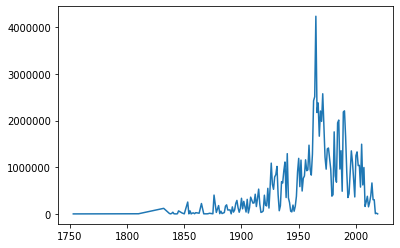

In [34]:
plt.plot(aggregated_data.index, aggregated_data.values)

We can also use pandas plots to do this as well:

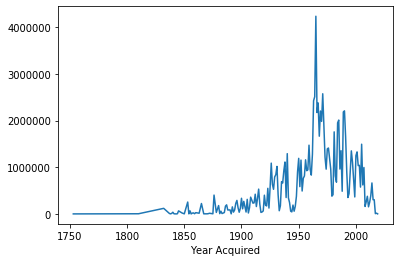

In [35]:
aggregated_data = b.groupby("Year Acquired")["Square Footage"].sum()
aggregated_data.plot()

We can aggregate in a bunch of different ways!

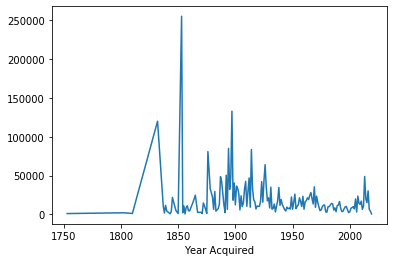

In [36]:
aggregated_data_average = b.groupby("Year Acquired")["Square Footage"].mean()
aggregated_data_average.plot()

Let's go bananas!  We want:
 * only buildings from the University of Illinois
 * Ordered by the Year Acquired
 * And we what the total square footage for reach year!

In [37]:
b.loc[b["Agency Name"] == "University of Illinois"].groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1857.0      3000.0
1870.0      2864.0
1878.0     33071.0
1888.0     28746.0
1890.0     27409.0
            ...   
2006.0    180000.0
2008.0    144580.0
2010.0     35000.0
2013.0    230665.0
2015.0      8283.0
Name: Square Footage, Length: 105, dtype: float64

In [38]:
mySortedVariable = b.loc[b["Agency Name"] == "University of Illinois"].groupby("Year Acquired")["Square Footage"].sum()

Let's make a nice plot of this!

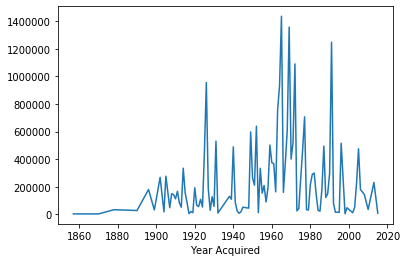

In [40]:
mySortedVariable.plot()

Let's try another one: how much square footage was created in different years across all agencies:

In [48]:
b.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

W can now also look at statistics of our subset from different years using "describe" as we've done before for the full dataset:

In [49]:
stats = b.groupby("Year Acquired")["Square Footage"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


This allows us to check out the distributions of each year.  For example, let's look at stats from 2015.  Because our `stats` dataframe that we've just created is indexed by year, we can just look for details about a specific year:

In [50]:
stats.loc[2015]

count        20.00000
mean      15254.65000
std       29153.08529
min         144.00000
25%         696.00000
50%        3152.00000
75%       10590.25000
max      105000.00000
Name: 2015.0, dtype: float64

We can also check out the statistics by index, in this case we look at the very first entry:

In [53]:
stats.iloc[0]
# since we have only the one entry, the STD is meaningless|

count       1.0
mean     1200.0
std         NaN
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: 1753.0, dtype: float64

Alright, so this is in fact a data viz class so lets make some plots then!

Lets first start by plotting the **maximum** square footage of any buildings created in a particular year:

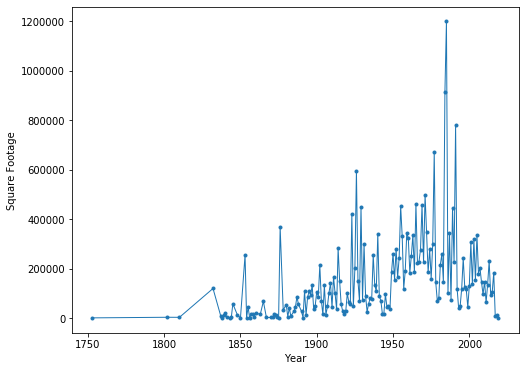

In [57]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
plt.show()

We can see that there is a large range of square footages - from around 0 to millions.  We'd like to see this better, so lets apply a "mutation" to our data in the form of how we visualize it:

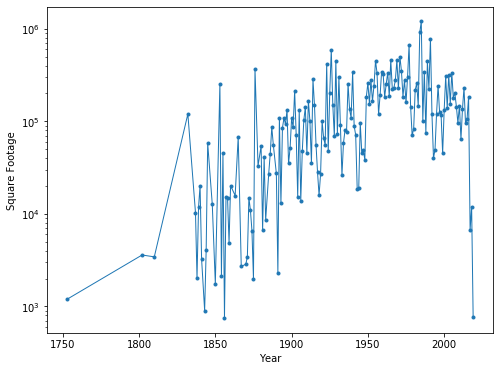

In [59]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
plt.show()

Now we can see a wider range of values from very small to very large on this log-scale. What this visualization is showing is out of all the  buildings built in a given year, what is the largest building (in square footage) that has been built.

We can make a similar plot for the minimum value of the square footage of buildings built in a year:

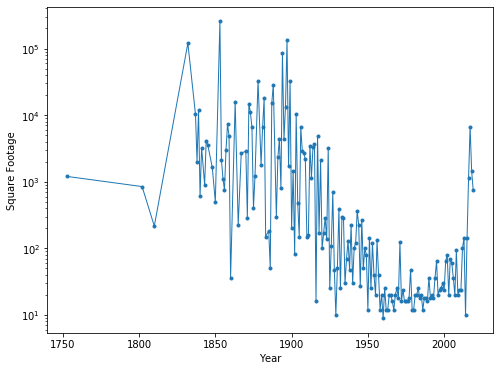

In [60]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["min"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
plt.show()

## Take away
* so far we have now played a bit with how to read in a dataset, look at different values in nicely formatted pandas tables, or by hand by checking out different values at different indicies
* We also started making some simple plots: the above plots show two different values from the same dataset - the maximum and minimum values for the square footage built in a year.
* Now we are going to get into some methods to combine the plots of these two different values (the min & max square footage), and some ways to "fancyify" our plots with things like interactive widgets

Let's now plot both min and max on the same plot:

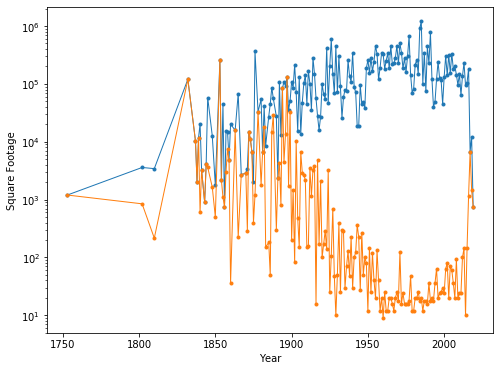

In [62]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0)
ax.plot(stats["min"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
plt.show()

But which is which??  Let's add a legend:

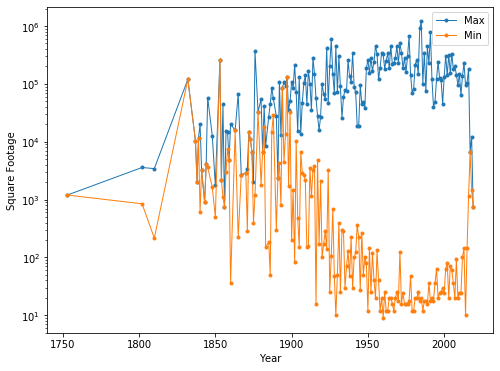

In [66]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0, label="Max")
ax.plot(stats["min"], marker='.', linewidth = 1.0, label="Min")
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")

# Note the difference between who "owns" this legend
#fig.legend()
ax.legend()

plt.show()

But lets say what I really want to highlight in my visualization is to hightlight the difference between the maximum & minimum square footage of buildings aquired in a year - this might be a good measure of the diversity of buildings that are built in a year (but there are certainly other factors).

I'll use a "fill between" plotting call to do this:

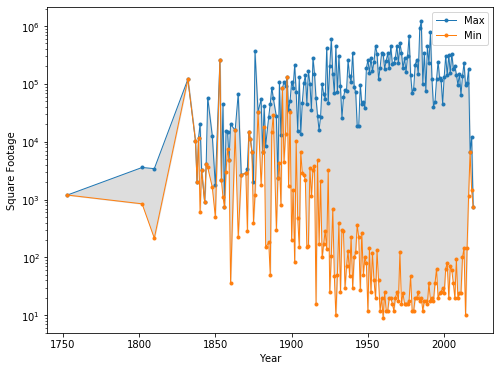

In [67]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0, label="Max")
ax.plot(stats["min"], marker='.', linewidth = 1.0, label="Min")
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")

ax.fill_between(stats.index, stats["min"], stats["max"], color = "#dddddd")

ax.legend()

plt.show()

So with this fill in we can see something interesting - as the years progress we are getting a greater diversity of buildings sq footage - the bigger things are getting bigger & smaller things getting smaller, though, this difference seems to peak around 1975 (not sure why).

We can also see that it seems like more square footage started being built in ~1850 - this makes sense since UIUC was founded in 1868. 

There were also large expansions around the early 1900's Willard airport was completed in 1954 after a period of large expansion after WWII.